# Reinforcement Learning

# TD learning

This notebook presents online policy evaluation by **TD learning**.

In [1]:
import numpy as np

In [2]:
from model import Maze, Walk, TicTacToe, Nim, ConnectFour
from agent import Agent, OnlineEvaluation
from dp import ValueIteration

## TD learning

In [35]:
class TDLearning(OnlineEvaluation):
    """Online policy evaluation by TD learning."""
        
    def update_values(self):
        """Update the value function online."""
        self.environment.reinit_state()
        state = self.environment.state
        self.add_state(state)
        for t in range(self.n_steps):
            state_code = self.environment.encode(state)
            self.state_count[state_code] += 1
            action = self.get_action(state)
            reward, stop = self.environment.step(action)
            state = self.environment.state
            self.add_state(state)
            # to be modified
            td = reward + self.gamma*self.state_value[self.environment.encode(state)] - self.state_value[state_code]
            self.state_value[state_code] += td / self.state_count[state_code]
            if stop:
                break

## To do

Complete the function ``update_values`` and test your code on various environments.

## Walk

In [36]:
walk = Walk()

In [37]:
# random policy
agent = Agent(walk)

In [38]:
algo = TDLearning(walk, gamma=0.9)

In [39]:
for t in range(100):
    algo.update_values()

In [40]:
values = algo.get_values()

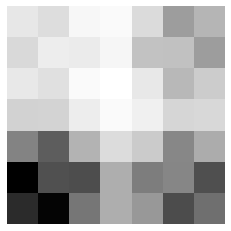

In [41]:
walk.display_values(values)

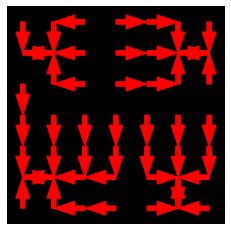

In [42]:
policy = algo.improve_policy()
walk.display_policy(policy)

In [43]:
algo = TDLearning(walk, policy, gamma=0.9)

## Maze

In [44]:
maze = Maze()
# set parameters
maze_map = np.load('maze_small.npy')
maze.set_parameters(maze_map, (1, 0), [(3, 8)])
# init
maze = Maze()

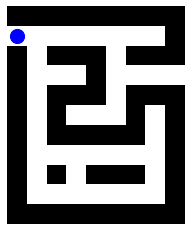

In [45]:
maze.display()

In [46]:
algo = TDLearning(maze)

In [47]:
n_episodes = 100
for t in range(n_episodes):
    algo.update_values()

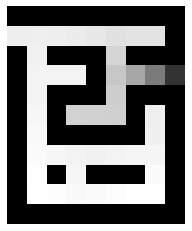

In [48]:
values = algo.get_values()
maze.display_values(values)

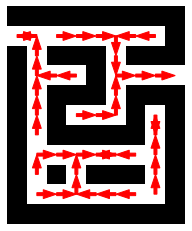

In [49]:
policy = algo.improve_policy()
maze.display_policy(policy)

## To do

Try the larger maze (see below).

* What do you observe?
* Explain the results.

In [50]:
maze = Maze()
# set parameters
maze_map = np.load('maze.npy')
maze.set_parameters(maze_map, (1,0), [(1,20)])
# init
maze = Maze()

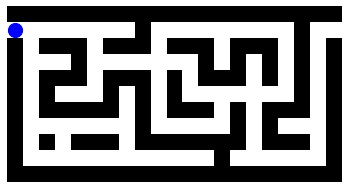

In [51]:
maze.display()

In [52]:
algo = TDLearning(maze)

In [53]:
n_episodes = 100
for t in range(n_episodes):
    algo.update_values()

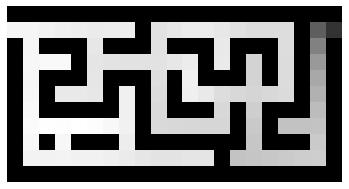

In [54]:
values = algo.get_values()
maze.display_values(values)

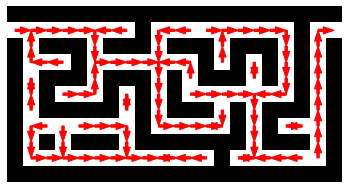

In [55]:
policy = algo.improve_policy()
maze.display_policy(policy)

## Tic-Tac-Toe

In [56]:
Game = TicTacToe

In [57]:
game = Game()

In [58]:
# random player
agent = Agent(game)

In [59]:
# wins, ties, losses
agent.get_game_stats()

[60, 19, 21]

In [60]:
algo = TDLearning(game)

In [61]:
# training
n_games = 1000
for t in range(n_games):
    algo.update_values()

In [62]:
# known states
len(algo.get_states())

3161

In [63]:
# improve policy
policy = algo.improve_policy()

In [64]:
policy(game.init_state())

(array([1.]), [(1, 1)])

In [65]:
# test this new policy
agent = Agent(game, policy)
agent.get_game_stats()

[89, 6, 5]

In [66]:
def one_step_policy(state):
    game = Game()
    player, board = state
    actions = game.get_all_actions(state)
    # win move
    for action in actions:
        probs, states, rewards = game.get_model(state, action)
        if player in rewards:
            return [1], [action]
    # move to avoid defeat
    for action in actions:
        state = -player, board
        probs, states, rewards = game.get_model(state, action)
        if -player in rewards:
            return [1], [action]
    # random move
    if len(actions):
        probs = np.ones(len(actions)) / len(actions)
        return probs, actions
    return [1], [None]

In [67]:
# compare to one-step policy
agent = Agent(game, one_step_policy)
agent.get_game_stats()

[91, 7, 2]

In [88]:
# a stronger adversary
game = Game(adversary_policy=one_step_policy)

In [89]:
# before training
agent = Agent(game, policy)
agent.get_game_stats()

[16, 27, 57]

In [90]:
algo = TDLearning(game)

In [91]:
# training 
n_games = 100000
for t in range(n_games):
    algo.update_values()

In [92]:
policy = algo.improve_policy()

In [93]:
# after training (you might need to further train your player)
agent = Agent(game, policy)
agent.get_game_stats()

[39, 61, 0]

In [74]:
# a perfect adversary
game = Game()
algo = ValueIteration(game)
algo.get_optimal_values()
perfect_adversary = algo.improve_policy(player=-1)

In [75]:
game = Game(adversary_policy=perfect_adversary)

In [76]:
# before training
agent = Agent(game, policy)
agent.get_game_stats()

[0, 35, 65]

In [77]:
algo = TDLearning(game)

In [78]:
# training
n_games = 1000
for t in range(n_games):
    algo.update_values()
my_policy = algo.improve_policy()

In [79]:
# after training (you might need to further train your player)
agent = Agent(game, policy)
agent.get_game_stats()

[0, 45, 55]

In [80]:
stop, states, rewards = agent.get_episode()

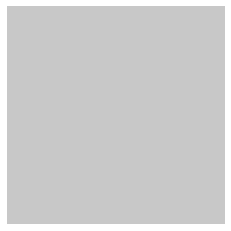

In [81]:
animation = game.display(states)

In [82]:
animation

In [83]:
# training the adversary
game = Game(play_first=False, player=-1)

In [84]:
algo = TDLearning(game, player=-1)

In [85]:
n_games = 1000
for t in range(n_games):
    algo.update_values()

In [86]:
adversary_policy = algo.improve_policy()

In [87]:
# after training (you might need to further train your player)
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy)
agent.get_game_stats()

[33, 4, 63]

## To do

* Try other games (Nim, Connect Four).
* What do you observe?

In [94]:
Game = ConnectFour

In [95]:
game = Game()

In [96]:
# random player
agent = Agent(game)

In [97]:
# wins, ties, losses
agent.get_game_stats()

[59, 0, 41]

In [98]:
algo = TDLearning(game)

In [99]:
# training
n_games = 1000
for t in range(n_games):
    algo.update_values()

In [100]:
# known states
len(algo.get_states())

18515

In [101]:
# improve policy
policy = algo.improve_policy()

In [102]:
policy(game.init_state())

(array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714]),
 [0, 1, 2, 3, 4, 5, 6])

In [103]:
# test this new policy
agent = Agent(game, policy)
agent.get_game_stats()

[43, 0, 57]

In [104]:
def one_step_policy(state):
    game = Game()
    player, board = state
    actions = game.get_all_actions(state)
    # win move
    for action in actions:
        probs, states, rewards = game.get_model(state, action)
        if player in rewards:
            return [1], [action]
    # move to avoid defeat
    for action in actions:
        state = -player, board
        probs, states, rewards = game.get_model(state, action)
        if -player in rewards:
            return [1], [action]
    # random move
    if len(actions):
        probs = np.ones(len(actions)) / len(actions)
        return probs, actions
    return [1], [None]

In [105]:
# compare to one-step policy
agent = Agent(game, one_step_policy)
agent.get_game_stats()

[96, 0, 4]

In [106]:
# a stronger adversary
game = Game(adversary_policy=one_step_policy)

In [107]:
# before training
agent = Agent(game, policy)
agent.get_game_stats()

[6, 0, 94]

In [108]:
algo = TDLearning(game)

In [109]:
# training 
n_games = 10000
for t in range(n_games):
    algo.update_values()

In [110]:
policy = algo.improve_policy()

KeyboardInterrupt: 

In [ ]:
# after training (you might need to further train your player)
agent = Agent(game, policy)
agent.get_game_stats()

[39, 61, 0]

In [ ]:
# a perfect adversary
game = Game()
algo = ValueIteration(game)
algo.get_optimal_values()
perfect_adversary = algo.improve_policy(player=-1)

In [ ]:
game = Game(adversary_policy=perfect_adversary)

In [ ]:
# before training
agent = Agent(game, policy)
agent.get_game_stats()

[0, 35, 65]

In [ ]:
algo = TDLearning(game)

In [ ]:
# training
n_games = 1000
for t in range(n_games):
    algo.update_values()
my_policy = algo.improve_policy()

In [ ]:
# after training (you might need to further train your player)
agent = Agent(game, policy)
agent.get_game_stats()

[0, 45, 55]

In [ ]:
stop, states, rewards = agent.get_episode()

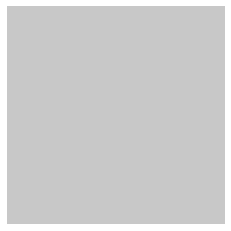

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
# training the adversary
game = Game(play_first=False, player=-1)

In [ ]:
algo = TDLearning(game, player=-1)

In [ ]:
n_games = 1000
for t in range(n_games):
    algo.update_values()

In [ ]:
adversary_policy = algo.improve_policy()

In [ ]:
# after training (you might need to further train your player)
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy)
agent.get_game_stats()

[33, 4, 63]